## Baryon asymmetry

https://arxiv.org/pdf/1908.04818.pdf

Walter new data

In [1]:
import numpy as np
import pandas as pd
import subprocess
import time
import sys

%matplotlib inline
import matplotlib.pyplot as plt 

In [2]:
#For good plots
plt.rcParams.update({'font.size': 20}) 
#plt.rc('font',size='18')

In [3]:
#Read file
#xd = pd.read_csv('nbs-scan-before-walter.csv')
# Walter new file: with good points after the potential conditions
xd=pd.read_csv('new_asymmetry_220322.csv')
#xd = pd.read_csv('nbs-scan.csv')
del xd['Unnamed: 0']

xd.shape

(69573, 44)

cleaning NAN and negative values in $\Delta n_B$

In [4]:
xd = xd[np.abs(xd.Deltan_B) >0.]

xd = xd.reset_index()
del[xd['index']]

In [5]:
xd.shape

(69573, 44)

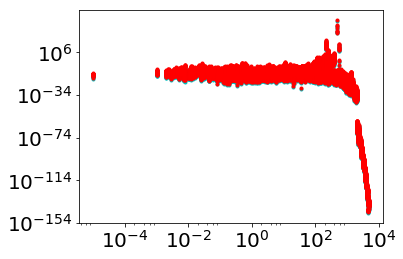

In [6]:
plt.figure(figsize=(6,4))

plt.loglog(xd.MZp,xd.etaB,'c.')
plt.loglog(xd.MZp,xd.new_etaB,'r.')

plt.tight_layout()
plt.show()

### Anality SI cross-section

In [7]:
#Parameters
fN = 0.25
v = 244.868782
vev = 244.868782
#nucleon mass in GeV (proton and neutron mass)
MNp = 938.27*1.e-3
MNn = 939.56*1.e-3 
## GeV-2 to cm-2
#http://www.saha.ac.in/theory/palashbaran.pal/conv.html
GeVtomin2topb = (5.06*1.e+13)**(-2)*1.e+36

# XENON-129 and XENON-131
Z = 54
#A = 129
A = 131.293
#SARAH
GF = 1.166370e-05
MW = 79.6565734
MZ = 91.1887000

Theta_W = np.arccos(MW/MZ)
alpha   = 1./137.035999
ce      = np.sqrt(4.*np.pi*alpha)
g       = ce/np.sin(Theta_W)
gp      = ce/np.cos(Theta_W)

In [8]:
xd['mchi'] = xd.mot
xd['g1p'] = xd['gp']
xd['YA2'] = xd['Lambda_S']

xd['mr'] = MNn*xd.mchi/(MNn+xd.mchi)

xd['SIN'] = (1./(4*np.pi))*xd.mr**2*(xd.gp**4/xd.MZp**4)*(-2+3)**2*GeVtomin2topb

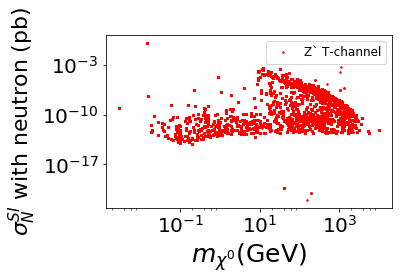

In [9]:
plt.figure(figsize=(6,4))

plt.loglog(xd.mchi, xd.SIN, color='red', marker='.',ms=3,linestyle='', label=r'Z` T-channel')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.ylabel(r'$\sigma_N^{SI}$ with neutron (pb)',size=22)
plt.legend(prop={'size':12},loc='best')

plt.tight_layout()
plt.show()

In [10]:
#Read old file for DM + neutrinos
yd = pd.read_csv('../DarkBariogenesis/good-points.csv')
#yd = pd.read_csv('../DarkBariogenesis/good-points-under-panda.csv')
del yd['Unnamed: 0']

yd.shape

(1350, 105)

$$ s \approx 2\pi^2 g^{*}T_c^3/45  $$

$$ g^{*}\approx g_B +(7/8)g_F \approx \mathcal{O}(100) $$

$$ \eta_B = \dfrac{\Delta n_B}{s} \approx 0.9 \times 10^{-10}$$

Experimental value: $[\eta-\Delta\eta,\eta+\Delta\eta]$

In [11]:
eta_exp = 0.9*1e-10
eta_min = (5.8/7.04)*1e-10
eta_max = (6.5/7.04)*1e-10
eta_med = (eta_min+eta_max)/2.

delta_eta = eta_max-eta_med

print(eta_min,eta_med, eta_max, delta_eta)

8.238636363636364e-11 8.735795454545455e-11 9.232954545454546e-11 4.971590909090916e-12


### entropy $s$ value

In [12]:
#Tc = 246.
gx = 110.
xd['entropy'] = (2.*np.pi**2*gx*(xd.Tnt)**3/45.)
#print(entropy)

### $\eta_B=\dfrac{\Delta n_B}{s}$ value

In [13]:
xd['me_new_etaB'] = np.abs(xd.Deltan_B)/xd.entropy

In [14]:
xd[['etaB','new_etaB','me_new_etaB']][:3]

,etaB,new_etaB,me_new_etaB
0,7.628943e-20,4.484713e-19,4.469866e-19
1,6.364151e-92,8.489851e-91,8.406522e-91
2,9.050349e-17,1.056112e-15,1.047144e-15


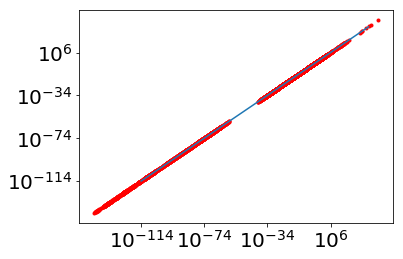

In [15]:
plt.figure(figsize=(6,4))

a=np.linspace(1e-114,1e30,20)

plt.loglog(xd.new_etaB,xd.me_new_etaB,'r.')
plt.plot(a,a)

plt.tight_layout()
plt.show()

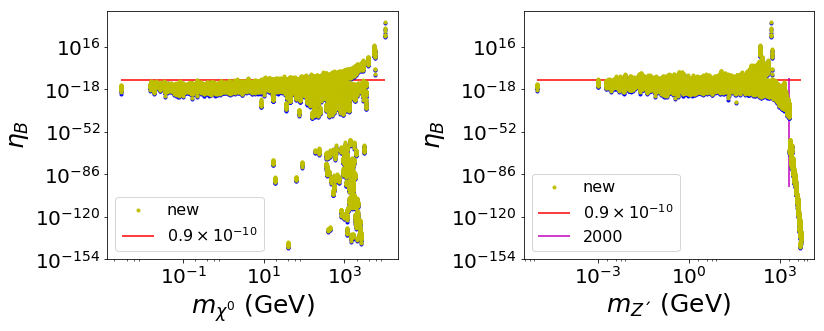

In [18]:
plt.figure(figsize=(12,5))

plt.subplot(121)
plt.loglog(xd.mot,xd.etaB,'b.',label=r'')
plt.loglog(xd.mot,xd.new_etaB,'y.',label=r'new')

plt.hlines(0.9e-10,xd.mot.min(),xd.mot.max(),'r',label=r'$0.9 \times 10^{-10}$')

plt.xlabel(r'$m_{\chi^0}$ (GeV)',size=25)
plt.ylabel(r'$\eta_B$',size=25)
plt.legend(prop={'size':16},loc='best')

#plt.ylim(1e-39,1e-6)

plt.subplot(122)
plt.loglog(xd.MZp,xd.etaB,'b.',label=r'')
plt.loglog(xd.MZp,xd.new_etaB,'y.',label=r'new')

plt.hlines(0.9e-10,xd.MZp.min(),xd.MZp.max(),'r',label=r'$0.9 \times 10^{-10}$')

plt.vlines(2000.,1e-96,1e-9,'m',label=r'2000')

plt.xlabel(r'$m_{Z´}$ (GeV)',size=25)
plt.ylabel(r'$\eta_B$',size=25)
plt.legend(prop={'size':16},loc='best')

#plt.ylim(1e-39,1e-6)

plt.tight_layout()
plt.show()

Filtering

In [13]:
#  GOOD ETA TO 10 SIGMA
zd=xd[np.logical_and(xd.new_etaB > eta_med-(15.*delta_eta) , xd.new_etaB < eta_med+(15.*delta_eta))]

zd = zd.reset_index()
del[zd['index']]

#export short file
#zd.to_csv('../DarkBariogenesis/etaB_10.csv')

#  BAD ETA 
wd=xd[np.logical_or(xd.new_etaB < eta_med-(15.*delta_eta) , xd.new_etaB > eta_med+(15.*delta_eta))]

wd = wd.reset_index()
del[wd['index']]

#wd.to_csv('good-points.csv')

In [14]:
print(yd.shape,xd.shape,zd.shape,wd.shape,(xd.shape[0]-zd.shape[0]-wd.shape[0]))

(1350, 105) (69573, 51) (1813, 51) (67760, 51) 0


### SI: $\sigma_{\text{SI}}^N$

In [15]:
from indirectdirect import *

In [16]:
from scipy import interpolate

#XENON1T .txt
names1 = ['MDM', 'XENON1TSI']
xe = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_XENON1T/XENON1T-2018.txt')
xdxe = pd.DataFrame(xe, columns=names1)

XENON1T=interpolate.interp1d(xdxe.MDM,xdxe.XENON1TSI)

#PANDAS 1708.06917
names1 = ['MDM', 'pandasSI']
a = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/PandaX/pandaXII.txt')
dd1 = pd.DataFrame(a, columns=names1)

pandaX=interpolate.interp1d(dd1.MDM,dd1.pandasSI)

#PANDAS 2107.13438
names1 = ['MDM', 'pandaxSI']
b = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/PandaX/pandax-2021/pandax21.txt')
dd2 = pd.DataFrame(b, columns=names1)

pandaX21=interpolate.interp1d(dd2.MDM,dd2.pandaxSI)

#LZ prospects 1802.06039
names1 = ['MDM', 'LZ']
a = pd.read_csv('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_LZ/LZ-SI-prosp-2018.csv',names=names1, header=None)
LZSI = interpolate.interp1d(a.MDM, a.LZ)

#Neutrino-coherent-scattering
names2= ['MDM', 'NCS']
ncs = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/Neutrino-coherent-scattering/Fig26-13108327.txt')
xdncs = pd.DataFrame(ncs, columns=names2)

NCS=interpolate.interp1d(xdncs.MDM,xdncs.NCS)

#DARWIN prospects
names1 = ['MDM', 'DAR']
dd1=pd.read_csv('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_Darwin/darwin-SI.csv', names=names1, header=None)

DARSI=interpolate.interp1d(dd1.MDM,dd1.DAR)

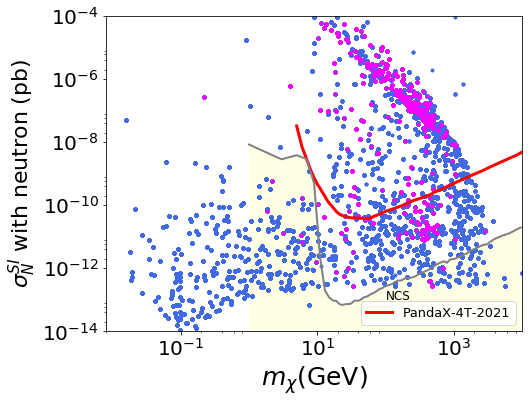

In [17]:
plt.figure(figsize=(8,6))

plt.loglog(xd.mchi, xd.SIN, color='royalblue', marker='o',ms=3,linestyle='', label=r'')
plt.loglog(zd.mchi, zd.SIN, color='magenta', marker='o',ms=3,linestyle='', label=r'')

#plot pandaX 2107.13438
m=np.arange(5,10000)
plt.loglog(m,pandaX21(m)*1e+36,'r-',lw=3,label='PandaX-4T-2021')

#Neutrino coherent scattering
n=np.arange(1,9.5e+3,2)
plt.loglog(n,NCS(n),color='grey',lw=2.0,label='')
back=[]
for i in range(0,len(n)):
    m = NCS(n[i])
    back.append(m)
back=np.asarray(back)
plt.fill_between(n,1.e-38,back,facecolor='yellow',alpha=0.1,label='')

plt.text(1e2, 1e-13, 'NCS', color='black', fontsize=12)

plt.xlabel(r'$m_{\chi}$(GeV)',size=25)
plt.ylabel(r'$\sigma_N^{SI}$ with neutron (pb)',size=22)
plt.legend(prop={'size':13},loc='best')

plt.xlim(8e-3,1.0e4)
plt.ylim(1e-14,1e-4)

plt.tight_layout()
plt.show()

Cut under PandaX

In [18]:
# zd has good etaB. wd has bad etaB
pd1 = wd[np.logical_and(wd.mchi > 5,wd.mchi < 10000)]
pd0 = pd1[pd1.SIN < pandaX21(pd1.mchi)*1e+36]
pd00 = wd[wd.mchi < 5]

gd = pd.concat([pd0,pd00],ignore_index=True )
gd = gd.reset_index()
del[gd['index']]

In [25]:
#points wit bad etaB to run againt.
#gd.to_csv('good-points.csv')

In [19]:
print(wd.shape, gd.shape)

(67760, 51) (49641, 51)


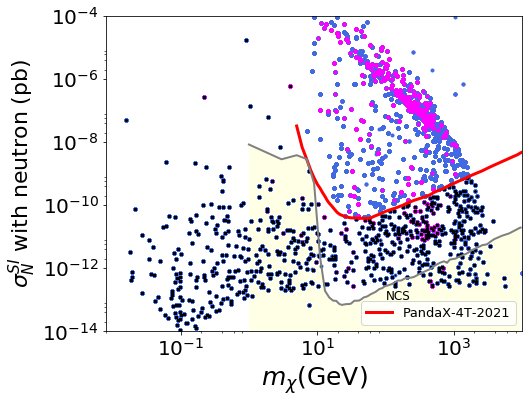

In [26]:
plt.figure(figsize=(8,6))

plt.loglog(xd.mchi, xd.SIN, color='royalblue', marker='o',ms=3,linestyle='', label=r'')
plt.loglog(zd.mchi, zd.SIN, color='magenta', marker='o',ms=3,linestyle='', label=r'')
plt.loglog(gd.mchi, gd.SIN, color='black', marker='o',ms=1,linestyle='', label=r'')

#plot pandaX 2107.13438
m=np.arange(5,10000)
plt.loglog(m,pandaX21(m)*1e+36,'r-',lw=3,label='PandaX-4T-2021')

#Neutrino coherent scattering
n=np.arange(1,9.5e+3,2)
plt.loglog(n,NCS(n),color='grey',lw=2.0,label='')
back=[]
for i in range(0,len(n)):
    m = NCS(n[i])
    back.append(m)
back=np.asarray(back)
plt.fill_between(n,1.e-38,back,facecolor='yellow',alpha=0.1,label='')

plt.text(1e2, 1e-13, 'NCS', color='black', fontsize=12)

plt.xlabel(r'$m_{\chi}$(GeV)',size=25)
plt.ylabel(r'$\sigma_N^{SI}$ with neutron (pb)',size=22)
plt.legend(prop={'size':13},loc='best')

plt.xlim(8e-3,1.0e4)
plt.ylim(1e-14,1e-4)

plt.tight_layout()
plt.show()

### Next etep: run Darbaryogenesis rutine againt for the points with good SI

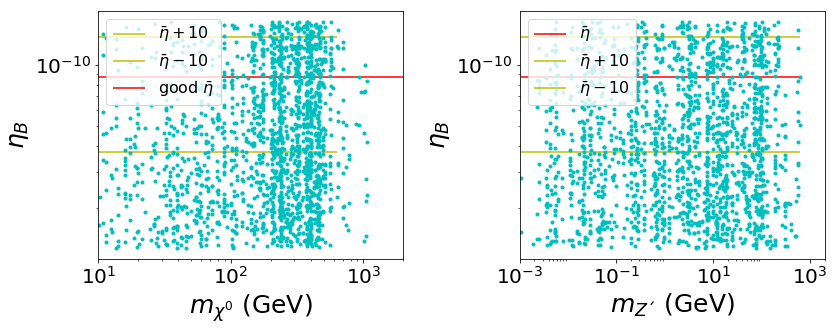

In [27]:
plt.figure(figsize=(12,5))

plt.subplot(121)
plt.loglog(zd.mot, zd.new_etaB,'c.',label=r'')
plt.hlines(eta_med+(10.*delta_eta),zd.MZp.min(),zd.MZp.max(),'y',label=r'$\bar{\eta}+10$')
plt.hlines(eta_med-(10.*delta_eta),zd.MZp.min(),zd.MZp.max(),'y',label=r'$\bar{\eta}-10$')

plt.hlines(eta_med,zd.mot.min(),zd.mot.max(),'r',label=r'good $\bar{\eta}$')

plt.xlabel(r'$m_{\chi^0}$ (GeV)',size=25)
plt.ylabel(r'$\eta_B$',size=25)
plt.legend(prop={'size':16},loc='best')

#plt.ylim(eta_min,eta_max)
plt.xlim(1e+1,2e3)

plt.subplot(122)
plt.loglog(zd.MZp, zd.new_etaB,'c.',label=r'')

plt.hlines(eta_med,zd.MZp.min(),zd.MZp.max(),'r',label=r'$\bar{\eta}$')
plt.hlines(eta_med+(10.*delta_eta),zd.MZp.min(),zd.MZp.max(),'y',label=r'$\bar{\eta}+10$')
plt.hlines(eta_med-(10.*delta_eta),zd.MZp.min(),zd.MZp.max(),'y',label=r'$\bar{\eta}-10$')

plt.xlabel(r'$m_{Z´}$ (GeV)',size=25)
plt.ylabel(r'$\eta_B$',size=25)
plt.legend(prop={'size':16},loc='best')

#plt.ylim(eta_min,eta_max)
plt.xlim(1e-3,2e3)

plt.tight_layout()
plt.show()

### Filtering data

yd is the Dataframe with all the good points (relic density and neutrinos). zd are the points with good nB. We will export a file with the points with at nB = 0 to run again in the cluster.

In [20]:
print(yd.shape,xd.shape,zd.shape,wd.shape,(wd.shape[0]+zd.shape[0]-xd.shape[0]))

(1350, 105) (69573, 51) (1813, 51) (67760, 51) 0


extracting the good etaB for the DM+nu file

In [21]:
# It takes the good etaB value at the moment, otherwise it put etaB=0
xx=[]

for j in range(0,yd.shape[0]):#good DM DataFrame
    
    MZp = yd.MZp[j] #element of the big dataframe

    for i in range(0,zd.shape[0]):#run zd with good nB

        if eval(format(MZp,'.6f')) == eval(format(zd.MZp[i],'.6f')):
            #print("found",i)

            etaB = zd.new_etaB[i]
            lamt = zd.lamt[i]
            tht = zd.tht[i]

            break

        else:
            etaB = 0.
            lamt = 0.
            tht = 0.

    xx.append([etaB,lamt,tht])

xx=np.asarray(xx)

xetaB=pd.DataFrame(xx,columns=['etaB','lamt','tht'])  

In [22]:
print(yd.shape,zd.shape,xetaB.shape)

(1350, 105) (1813, 51) (1350, 3)


(1350, 105) (868, 51) (1350, 3)


In [24]:
#add to the Dataframe
yd['etaB'] = xetaB['etaB']
yd['lamt'] = xetaB['lamt']
yd['tht'] = xetaB['tht']

In [27]:
############## yd element with good etaB in Walter file ################
kkk = yd[yd.etaB != 0.]# with a good etaB
kkk = kkk.reset_index()
del[kkk['index']]
#kkk.to_csv('../DarkBariogenesis/etaB.csv')
kkk.to_csv('../DarkBariogenesis/etaB_10.csv')
####################################################################

############## yd element with bad etaB in Walter file ################
kk = yd[yd.etaB == 0]
#export points to run again the Baryogenesis rutine
kk = kk.reset_index()
del[kk['index']]
kk.to_csv('good-points.csv')

print(kkk.shape,kk.shape,(kkk.shape[0]+kk.shape[0]-yd.shape[0]))

(335, 108) (1015, 108) 0


In [28]:
kkk.shape

(335, 108)

In [30]:
# only points under pandaX
pd1 = kk[np.logical_and(kk.mchi > 5,kk.mchi < 10000)]
pd0 = pd1[pd1.SIN < pandaX21(pd1.mchi)*1e+36]
pd00 = kk[kk.mchi < 5]

gd = pd.concat([pd0,pd00],ignore_index=True )
gd = gd.reset_index()
del[gd['index']]
gd.to_csv('good-points.csv')

print(kk.shape,gd.shape)

(1015, 108) (565, 108)


extracting the bad etaB at the moment(in the Walter file) for the DM+nu file

In [95]:
# It takes the bad etaB value at the moment... wd is the bad dicctionary after Walter analysis
yy=[]

for j in range(0,kk.shape[0]):#good DM+nu+perturbativity and bad etaB in Walter file
    
    MZp = kk.MZp[j] #element of the big dataframe

    for i in range(0,wd.shape[0]):#run wd with good nB

        if eval(format(MZp,'.6f')) == eval(format(wd.MZp[i],'.6f')):
            #print("found",i)

            etaB = wd.new_etaB[i]
            lamt = wd.lamt[i]
            tht = wd.tht[i]

            break

        else:
            etaB = 0.
            lamt = 0.
            tht = 0.

    yy.append([etaB,lamt,tht])

yy=np.asarray(yy)

yetaB=pd.DataFrame(yy,columns=['etaB','lamt','tht'])  

In [96]:
yetaB.shape

(1099, 3)

In [97]:
yetaB[yetaB.etaB !=0][:3]

,etaB,lamt,tht
0,4.453675e-16,0.095864,-1.297448
1,9.172494e-15,0.043131,-0.871629
2,1.807706e-16,0.001130,-0.303024


In [98]:
#add to the Dataframe
kk['bad_etaB'] = yetaB['etaB']
kk['bad_lamt'] = yetaB['lamt']
kk['bad_tht'] = yetaB['tht']

In [100]:
tt = kk[kk.bad_etaB != 0]
#export points to run again the Baryogenesis rutine
tt = tt.reset_index()
del[tt['index']]
#tt.to_csv('good-points.csv')

print(tt.shape)

(1099, 111)


In [91]:
kk[['bad_etaB']][:3]

,bad_etaB
0,4.453675e-16
1,9.172494e-15
2,1.807706e-16


probe that my analysis is working

In [101]:
kkk.shape[0]+tt.shape[0]-yd.shape[0]

0

it since that all the yd Dataframe fulfill perturbativity